# Name: Pratisha Bista
# Student ID: 2408284
# Group: L5CG1 


> **The following cells contain an analysis of the World Happiness Report across the world. I aim to draw various insights from the given dataset adhering to the guidelines of this assessment while reclaiming my knowledge of Python data structures, working with datasets, and applying everything learned so far in the workshop, lectures, and tutorial classes.  
The main objective of this assessment is to apply the skills and concepts learned to future assessments.**

> **Dataset Provided: "WHR-2024-5CS037.csv"**

In [32]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

# Getting a Quick Overview of the Dataset

In [33]:
df = pd.read_csv('WHR-2024-5CS037.csv')

In [3]:
print(df.shape)

(143, 9)


In [4]:
print(df.head())

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                

In [5]:
print(df.columns)

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [6]:
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [7]:
print(df.isnull().sum())

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [13]:
columns_to_check = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Dystopia + residual'
]

columns_to_display = ['Country name'] + columns_to_check
rows_with_missing_values = df[df[columns_to_check].isnull().any(axis=1)]

print("Rows and columns with missing values".center(80, '-')) 
print(rows_with_missing_values[columns_to_display])

----------------------Rows and columns with missing values----------------------
           Country name  Log GDP per capita  Social support  \
61              Bahrain                 NaN             NaN   
87           Tajikistan                 NaN             NaN   
102  State of Palestine                 NaN             NaN   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
61                       NaN                           NaN         NaN   
87                       NaN                           NaN         NaN   
102                      NaN                           NaN         NaN   

     Perceptions of corruption  Dystopia + residual  
61                         NaN                  NaN  
87                         NaN                  NaN  
102                        NaN                  NaN  


In [10]:
df = df.dropna(subset=columns_to_check, how='all')
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

In [23]:
print("Updated number of rows and columns")
print(df.shape)

Updated number of rows and columns
(140, 9)


In [28]:
missing_values = df.isnull().sum()

if missing_values.any():
    print("Missing values in the updated dataframe:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the updated dataframe.")

There are no missing values in the updated dataframe.


> **Given that these rows have only the score column filled, and all the other columns are missing data, it would make sense to drop these rows. The missing data across multiple critical columns (like Log GDP per capita, Social support, etc.) makes it difficult to derive meaningful insights, and retaining rows like these could lead to misleading results. Happiness scores and related parameters such as Social Support, Freedom to Make Life Choices, Log GDP per capita, etc., are not independent.
For example, countries with very low GDP might have a different relationship between happiness and other factors compared to countries with high GDP. Simply filling missing values with a global mean or median ignores these complex interactions.
None of those countries have either highest or lowest score, so it makes sense to drop them.**

# Getting into the Problems

# 3.1 Problem 1: Getting Started with Data Exploration - Some Warm up exercises:

## 1. Data Exploration and Understanding
#### ● Dataset Overview:

1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [14]:
print(df.head(10))
print(df.shape)
print(df.columns)
print(df.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

#### ● Basic Statistics

1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [10]:
print("Mean, Median and Standard Deviation of the Score column".center(80, '-'))
print("\n")
col = 'score'
result = [df[col].mean(), df[col].median(), df[col].std()]

print("Mean", result[0])
print("Median", result[1])
print("Standard Deviation", result[2])

------------Mean, Median and Standard Deviation of the Score column-------------


Mean 5.52758041958042
Median 5.785
Standard Deviation 1.1707165099442993


In [49]:
print("Highest score:")
print(df[['Country name', 'score']].nlargest(1, 'score'))

print("Lowest scores:")
print(df[['Country name', 'score']].nsmallest(1, 'score'))

Highest score:
  Country name  score
0      Finland  7.741
Lowest scores:
    Country name  score
142  Afghanistan  1.721


#### ● Missing Values

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [9]:
print(df.isnull().sum())
print("\n")
columns_to_check = [
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Dystopia + residual'
]

columns_to_display = ['Country name'] + columns_to_check
rows_with_missing_values = df[df[columns_to_check].isnull().any(axis=1)]

print("Rows and columns with missing values".center(80, '-')) 
print("\n")
print(rows_with_missing_values[columns_to_display])

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


----------------------Rows and columns with missing values----------------------


           Country name  Log GDP per capita  Social support  \
61              Bahrain                 NaN             NaN   
87           Tajikistan                 NaN             NaN   
102  State of Palestine                 NaN             NaN   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
61                       NaN                           NaN         NaN   
87                       NaN                           NaN         NaN   
102                      NaN                           NaN         NaN   

     Perceptions of corruption  Dystopia + res

#### ● Filtering and Sorting

1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.


In [11]:
print("Countries with a score greater than 7.5".center(65, '￣'))
print("\n")
print(df[df['score'] > 7.5][['Country name', 'score']])

￣￣￣￣￣￣￣￣￣￣￣￣￣Countries with a score greater than 7.5￣￣￣￣￣￣￣￣￣￣￣￣￣


  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [13]:
top_10_GDP = df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top 10 countries with the highest GDP per capita:".center(65, '-'))
print("\n")
print(top_10_GDP)

--------Top 10 countries with the highest GDP per capita:--------


                 Country name  score  Log GDP per capita  Social support  \
7                  Luxembourg  7.122               2.141           1.355   
16                    Ireland  6.838               2.129           1.390   
29                  Singapore  6.523               2.118           1.361   
21       United Arab Emirates  6.733               1.983           1.164   
8                 Switzerland  7.060               1.970           1.425   
6                      Norway  7.302               1.952           1.517   
22              United States  6.725               1.939           1.392   
85  Hong Kong S.A.R. of China  5.316               1.909           1.184   
1                     Denmark  7.583               1.908           1.520   
5                 Netherlands  7.319               1.901           1.462   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
7                     

> **Finland despite having the highest score, does not chart the top 10 GDP per Capita** 

#### ● Adding New Columns
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
   
Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [15]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness_Category'] = df['score'].apply(categorize_happiness)
print(df[['Country name', 'score', 'Happiness_Category']].head(10))

  Country name  score Happiness_Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


## 2. Data Visualizations
#### • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
#### • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
#### • Plot a histogram for the Score column to show its distribution and also interpret.
#### • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

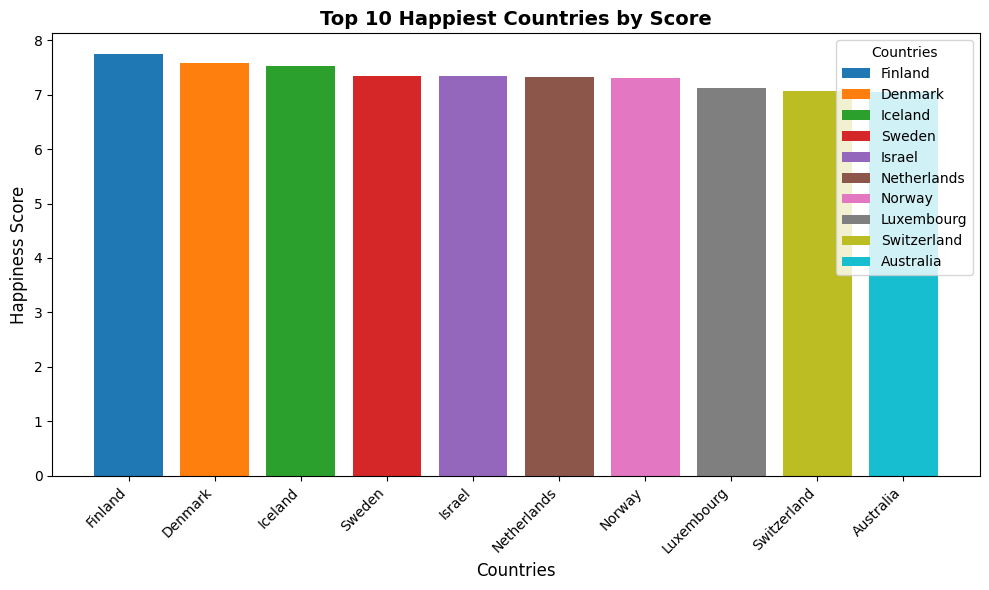

In [4]:
top_10 = df[['Country name', 'score']].nlargest(10, 'score')

country_names = top_10['Country name'].tolist()
scores = top_10['score'].tolist()

colors = list(mcolors.TABLEAU_COLORS.values())[:10]
fig, ax = plt.subplots(figsize=(10, 6))

# ax.set_ylim(0, 10) 
ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Happiness Score', fontsize=12)
ax.set_title('Top 10 Happiest Countries by Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

ax.legend(ax.bar(country_names, scores, color=colors), country_names, title='Countries', loc='upper right', fontsize=10)
plt.tight_layout()
fig.savefig("top_10_happiest_countries.png", dpi=300, bbox_inches="tight")
plt.show()

> **The bar chart above displays the top 10 happiest countries by score. X-axis represents the countries, and the happiness score is represented by y-axis. Each bar is plotted using distinctive colors to identify each one of them. The Y-axis range fits the minimum and maximum values of score which is (0-8). We can clearly observe that Finland stands as the top country with the highest happiness score, which is about 7.741, which is an impressive score for a top country. However, there isn’t much difference between Finland and all 9 other countries (7.057 – 7.741), this suggests that these nations share similar characteristics that promote happiness. If we were to observe the pattern, interestingly, except for Israel and Australia, 8 other nations are from Europe, suggesting a possible regional trend in happiness.**

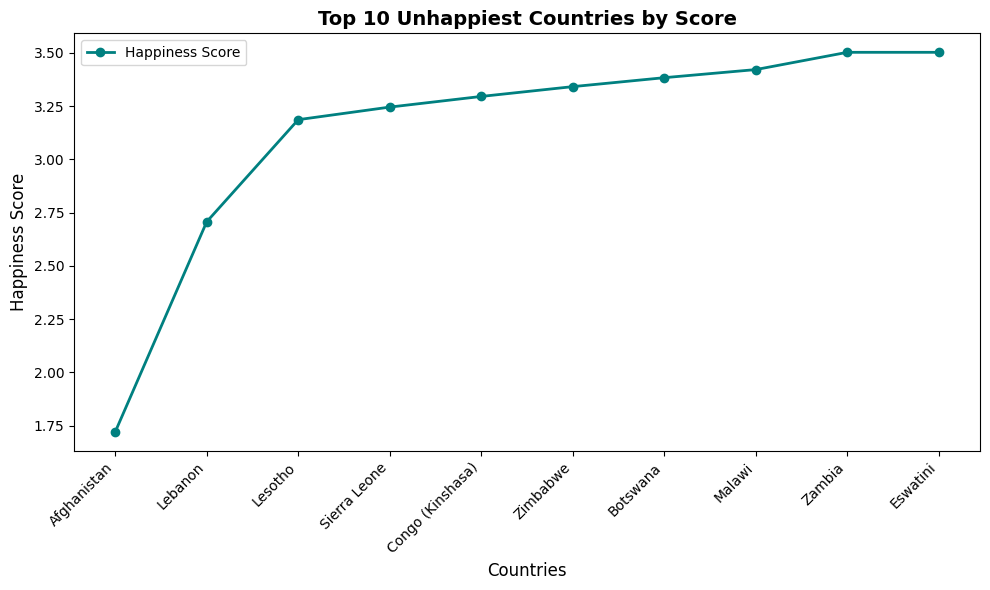

In [34]:
import matplotlib.pyplot as plt

top_unhappiest = df[['Country name', 'score']].nsmallest(10, 'score')

countries = top_unhappiest['Country name']
scores = top_unhappiest['score']
# print(countries, scores)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(countries, scores, label='Happiness Score', linestyle='-', marker='o', color='teal', linewidth=2)

ax.set_title('Top 10 Unhappiest Countries by Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Happiness Score', fontsize=12)

plt.xticks(rotation=45, ha='right')

ax.legend()

plt.tight_layout()

fig.savefig("top_10_unhappiest_countries.png", dpi=300, bbox_inches="tight")

plt.show()


> **Afghanistan with the lowest score of 1.721 serves as an extreme outlier. It has a notable gradual decline in the happiness score. The score from Lesotho (3.186) to Eswatini (3.502) show a gradual increase. The gap between Afghanistan and Lebanon suggests that its overall score is slightly higher, from we can predict that it may have relatively better social support or infrastructure than Afghanistan.**

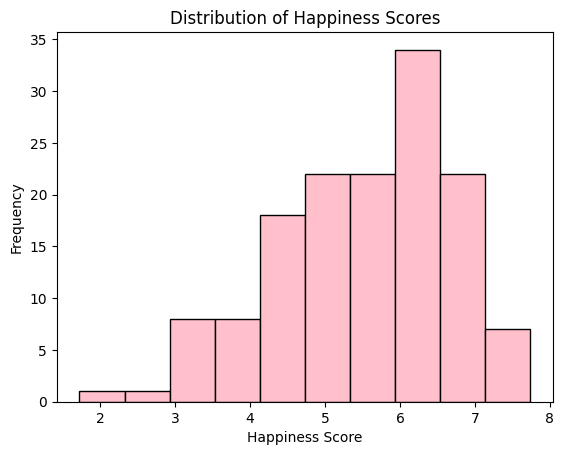

In [36]:
try:
    if 'score' not in df.columns:
        raise KeyError("'score' column not found in the DataFrame")
    
    plt.hist(df['score'], bins=10, color='pink', edgecolor='black')
    plt.title('Distribution of Happiness Scores')
    plt.xlabel('Happiness Score')
    plt.ylabel('Frequency')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

> **The histogram is left-skewed, as the tail on the left side (lower scores) is longer than the tail on the right side (higher scores). The highest frequency is observed for the happiness score of 6, with a frequency of around 35. Most countries' have happiness scores clustered around 5 and 6. There are fewer countries with very low or very high happiness scores. This histogram suggests that the majority of the country has moderate happiness scores, with fewer countries experiencing extreme levels of happiness or unhappiness.**

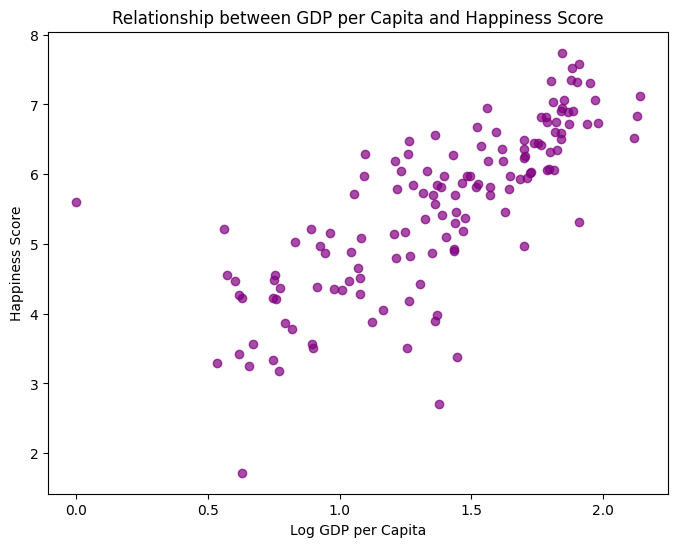

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='purple', alpha=0.7)

plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')

plt.show()

> **The datapoints in the middle right are tightly clustered which indicates the strong relationship. As the GDP per Capita increases, the Happiness Scores also tend to increase.**

# 3.2 Problem -2: Some Advance Data Exploration Task


### Task 1: Preparing the South-Asia 
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [6]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

In [12]:
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

> **According to the loaded data frame, we can observe that out of the list of South Asian Countries, Bhutan, Maldives and Sri Lanka do not have any records.**

In [19]:
south_asia_df.to_csv('South_Asian_Countries_HR.csv', index = False)
print("File saved!")

File saved!


### Task 2 - Composite Score Ranking

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics: Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [8]:
def compositeScore(row):
    return (0.40 * row['Log GDP per capita'] + 0.30 * row['Social support'] + 0.30 * row['Healthy life expectancy'])
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
south_asia_df['Composite Score'] = south_asia_df.apply(compositeScore, axis=1)
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  
92                       0.115                1.783           0.8159  
107                      0.074    

2. Rank the South Asian countries based on the Composite Score in descending order.

In [9]:
print(south_asia_df.nlargest(5, 'Composite Score'))

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  
92                       0.115                1.783           0.8159  
125                      0.122    

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

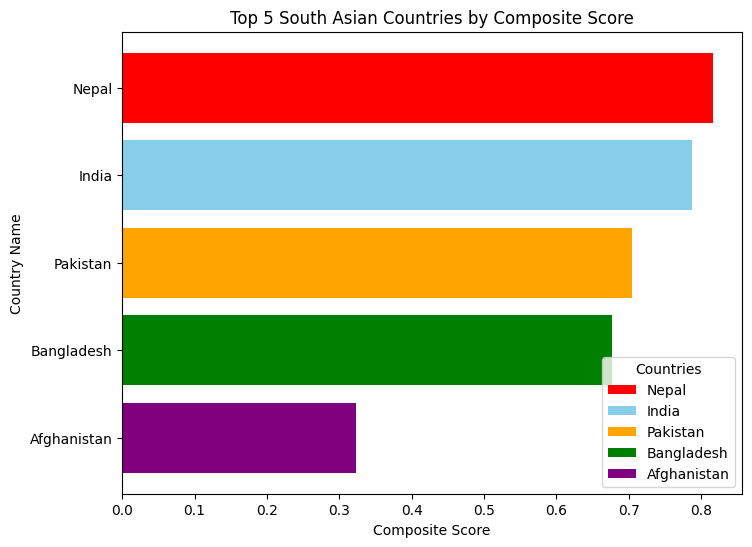

In [10]:
# plt.figure(figsize=(8, 6))
# colors = ['Red', 'skyblue', 'orange', 'green', 'purple']
# bars = plt.barh(
#     south_asia_df.nlargest(5, 'Composite Score')['Country name'],
#     south_asia_df.nlargest(5, 'Composite Score')['score'], 
#     color=colors)

# plt.xlabel('Composite Score')
# plt.ylabel('Country Name')
# plt.title('Top 5 South Asian Countries by Composite Score')

# plt.gca().invert_yaxis()
# plt.legend(bars, south_asia_df.nlargest(5, 'Composite Score')['Country name'], title="Countries")
# plt.savefig("top_5_south_asian_countries.png", dpi=300, bbox_inches="tight")
# plt.show()

colors = ['Red', 'skyblue', 'orange', 'green', 'purple']

top_5_south_asia = south_asia_df.nlargest(5, 'Composite Score')

plt.figure(figsize=(8, 6))
bars = plt.barh(
    top_5_south_asia['Country name'],
    top_5_south_asia['Composite Score'], 
    color=colors)

plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')

plt.gca().invert_yaxis()

plt.legend(bars, top_5_south_asia['Country name'], title="Countries")

plt.savefig("top_5_south_asian_countries.png", dpi=300, bbox_inches="tight")
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

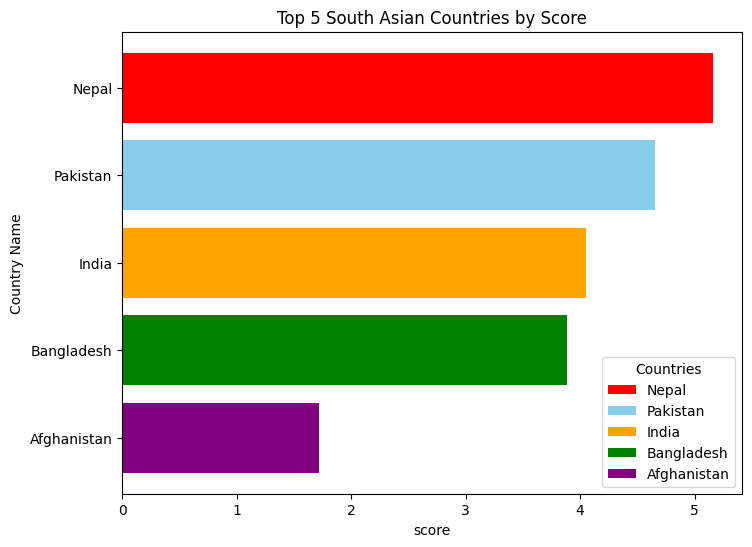

In [21]:
plt.figure(figsize=(8, 6))
colors = ['Red', 'skyblue', 'orange', 'green', 'purple']

bars = plt.barh(
    south_asia_df.nlargest(5, 'score')['Country name'],
    south_asia_df.nlargest(5, 'score')['score'], 
    color=colors)

plt.xlabel('score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Score')

plt.legend(bars, south_asia_df.nlargest(5, 'score')['Country name'], title="Countries")
plt.gca().invert_yaxis()
plt.savefig("top_asian_countries_score.png", dpi=300, bbox_inches="tight")

plt.show()

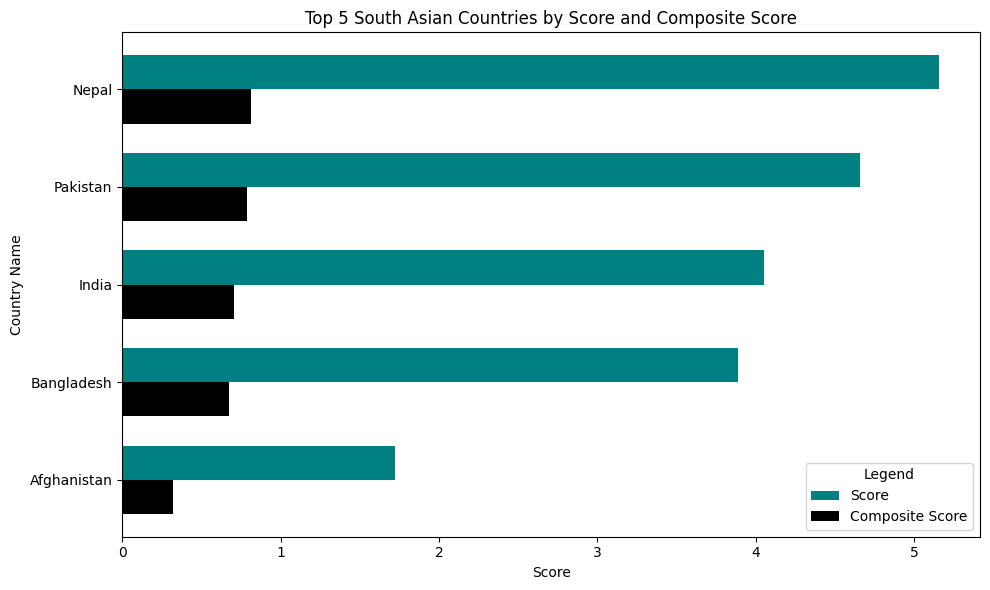

In [31]:
top_score_df = south_asia_df.nlargest(5, 'score')[['Country name', 'score']]
top_composite_score_df = south_asia_df.nlargest(5, 'Composite Score')[['Country name', 'Composite Score']]

bar_width = 0.35
index = np.arange(len(top_score_df))

plt.figure(figsize=(10, 6))

plt.barh(index - bar_width / 2, top_score_df['score'], bar_width, label='Score', color='teal')

plt.barh(index + bar_width / 2, top_composite_score_df['Composite Score'], bar_width, label='Composite Score', color='black')

plt.xlabel('Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Score and Composite Score')

plt.yticks(index, top_score_df['Country name'])
plt.tight_layout()
plt.gca().invert_yaxis()
plt.savefig("top_asian_countries_score&Composite.png", dpi=300, bbox_inches="tight")
plt.legend(title="Legend", loc='lower right')

plt.show()

> **Nepal stands out with a high happiness score despite potentially lower economic and social support metrics. The strong cultural or psychological factors may have influenced overall happiness. Afghanistan being the unhappiest country in the world has the lowest scores in both happiness and composite metrics in South Asia and still securing top 5 in South Asia is quite tricky. In the dataset, it is an extreme outlier. This will be justified by the evidence and reasoning in the upcoming interpretation. Overall, Afghanistan faces a significant challenge in improving overall well-being and economic conditions. The composite scores, which incorporate GDP per Capita, Social Support, and Healthy Life Expectancy, are generally lower than the happiness scores for all countries suggesting that the happiness scores are influenced by factors beyond just economic and social indicators. The disparity between happiness scores and composite scores across these countries suggests that subjective well-being may not always align with objective economic and social indicators.**

# Task - 3: Outlier Detection

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [17]:
q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

gdp_lower_bound = q1_gdp - 1.5 * iqr_gdp
gdp_upper_bound = q3_gdp + 1.5 * iqr_gdp

q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

score_lower_bound = q1_score - 1.5 * iqr_score
score_upper_bound = q3_score + 1.5 * iqr_score

gdp_outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < gdp_lower_bound) | 
                             (south_asia_df['Log GDP per capita'] > gdp_upper_bound)]

score_outliers = south_asia_df[(south_asia_df['score'] < score_lower_bound) | 
                               (south_asia_df['score'] > score_upper_bound)]


print("Outlier countries based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])
print("\n")

print("\nOutlier countries based on Score:")
print(score_outliers[['Country name', 'score']])
print("\n")

Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628



Outlier countries based on Score:
    Country name  score
142  Afghanistan  1.721




3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color

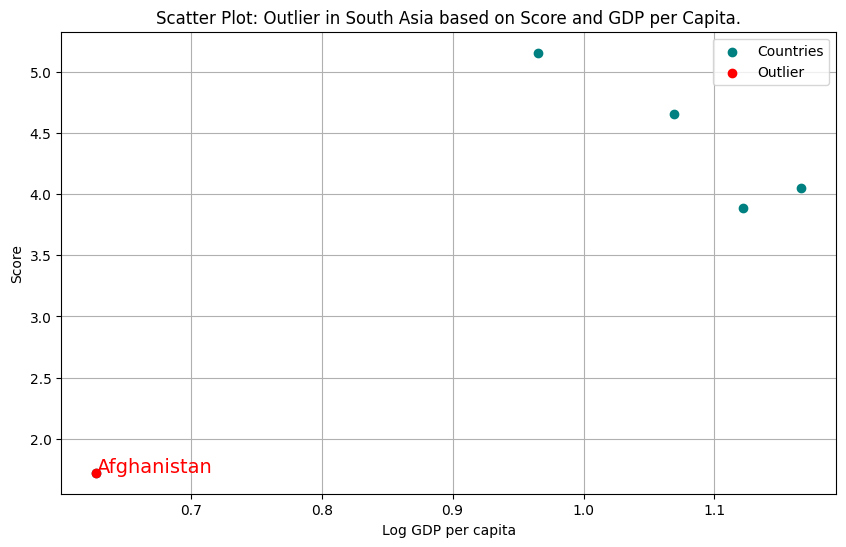

In [35]:
all_outliers = gdp_outliers.copy()
all_outliers['Outlier Type'] = 'Outlier'

for i, row in score_outliers.iterrows():
    if row['Country name'] not in all_outliers['Country name'].values:
        new_row = row.copy()
        new_row['Outlier Type'] = 'Score Outlier'
        all_outliers = all_outliers.append(new_row)

plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='teal', label='Countries')

for i, row in all_outliers.iterrows():
    color = 'red' if row['Outlier Type'] == 'Outlier' else 'orange'
    label = row['Outlier Type'] if i == all_outliers.index[0] else None
    plt.scatter(row['Log GDP per capita'], row['score'], color=color, label=label)
    plt.text(row['Log GDP per capita'], row['score'], row['Country name'], fontsize=14, color=color)

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot: Outlier in South Asia based on Score and GDP per Capita.')
plt.legend()
plt.grid(True)
plt.savefig("Outlier_detection.png", dpi=300, bbox_inches="tight")

plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

> **Afghanistan has a significantly lower GDP per Capita compared to other countries in the region. This is indicated by its position towards the lower end of the x-axis. Including Afghanistan's low GDP per Capita in the regional average will lower the overall average GDP for the region. Similarly, Afghanistan's low Happiness Score will pull down the average Happiness Score for South Asia. Without accounting for the outlier, the data analysis might suggest that South Asia has uniformly low scores, which is not representative of all countries.**

# Task - 4 - Exploring Trends Across Metrics:

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [14]:
corr_score_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
print(f"Correlation between Score and Freedom to Make Life Choices: {corr_score_freedom:.2f}")

corr_score_health = south_asia_df['score'].corr(south_asia_df['Healthy life expectancy'])
print(f"Correlation between Score and Healthy Life Expectancy: {corr_score_health:.2f}")

Correlation between Score and Freedom to Make Life Choices: 0.80
Correlation between Score and Healthy Life Expectancy: 0.61


>**Countries with higher freedom to make life choices tend to have higher Happiness Scores. 0.61 is a moderate positive correlation, indicating that countries with higher healthy life expectancy also tend to have higher Happiness Scores**

2. Create scatter plots with trendlines for these metrics against the Score.

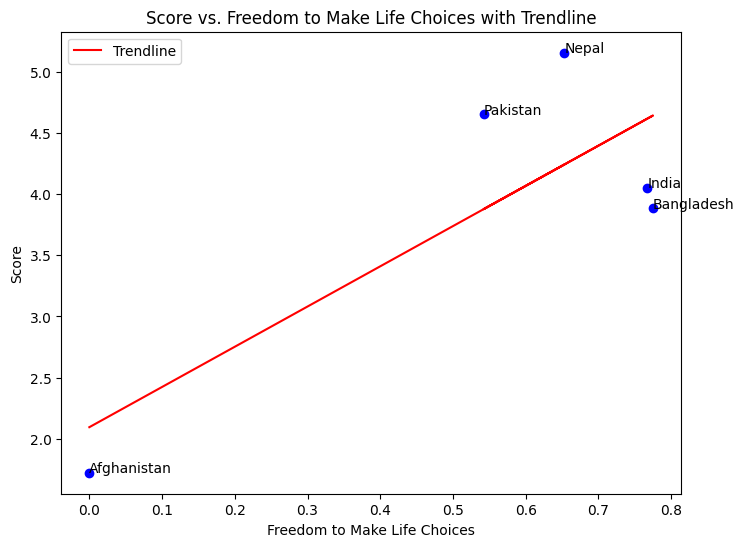

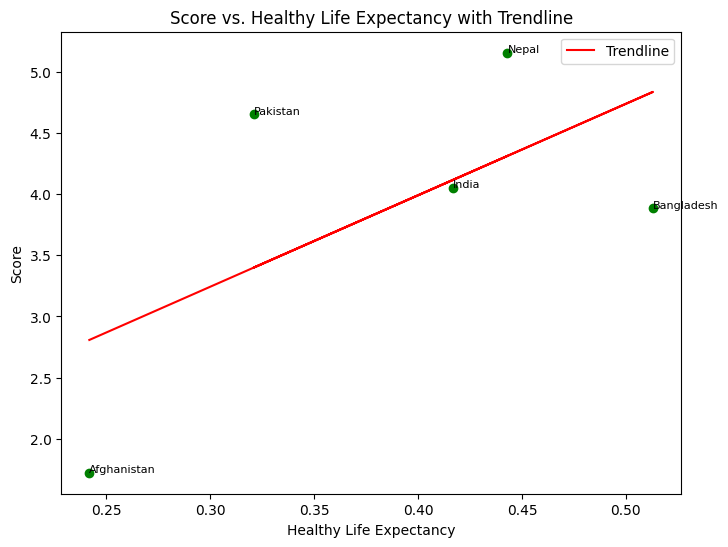

In [18]:

plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'], color='blue')

slope, intercept = np.polyfit(south_asia_df['Freedom to make life choices'], south_asia_df['score'], 1)

trendline = slope * south_asia_df['Freedom to make life choices'] + intercept

plt.plot(south_asia_df['Freedom to make life choices'], trendline, color='red', label='Trendline')

for i in range(len(south_asia_df)):
    plt.text(south_asia_df['Freedom to make life choices'].iloc[i],
             south_asia_df['score'].iloc[i],
             south_asia_df['Country name'].iloc[i], fontsize=10, color='black')

plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Score vs. Freedom to Make Life Choices with Trendline')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Healthy life expectancy'], south_asia_df['score'], color='green')

slope, intercept = np.polyfit(south_asia_df['Healthy life expectancy'], south_asia_df['score'], 1)

trendline = slope * south_asia_df['Healthy life expectancy'] + intercept

plt.plot(south_asia_df['Healthy life expectancy'], trendline, color='red', label='Trendline')

for i in range(len(south_asia_df)):
    plt.text(south_asia_df['Healthy life expectancy'].iloc[i],
             south_asia_df['score'].iloc[i],
             south_asia_df['Country name'].iloc[i], fontsize=8, color='black')

plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Score')
plt.title('Score vs. Healthy Life Expectancy with Trendline')
plt.legend()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

**The strongest relationship is between Freedom to Make Life Choices and the Score (0.80), indicating that this metric is a major factor for improving overall scores in South Asia. 
The weakest relationship (in this case) is with Healthy Life Expectancy (0.61). While still moderately correlated, it shows that longevity and healthcare improvements are somewhat less aligned with the overall Score compared to personal freedom.**

# Task 5: Gap Analysis

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [25]:
south_asia_df.loc[:, 'GDP-score gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
south_asia_df = south_asia_df.copy()
south_asia_df['GDP-score gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-score gap']])

    Country name  Log GDP per capita  score  GDP-score gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [26]:
ascending_order = south_asia_df.sort_values(by='GDP-score gap')

descending_order = south_asia_df.sort_values(by='GDP-score gap', ascending=False)

print("Countries ranked by GDP-score gap in ascending order:")
print(ascending_order[['Country name', 'GDP-score gap']])
print("\n")

print("\nCountries ranked by GDP-score gap in descending order:")
print(descending_order[['Country name', 'GDP-score gap']])
print("\n")

Countries ranked by GDP-score gap in ascending order:
    Country name  GDP-score gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093



Countries ranked by GDP-score gap in descending order:
    Country name  GDP-score gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193




3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart

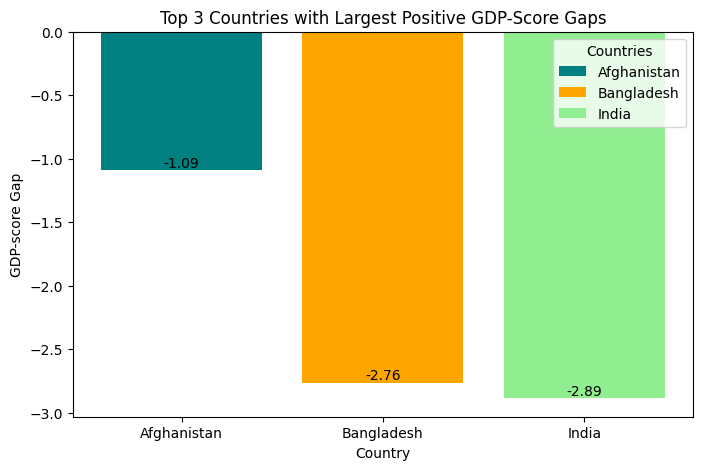

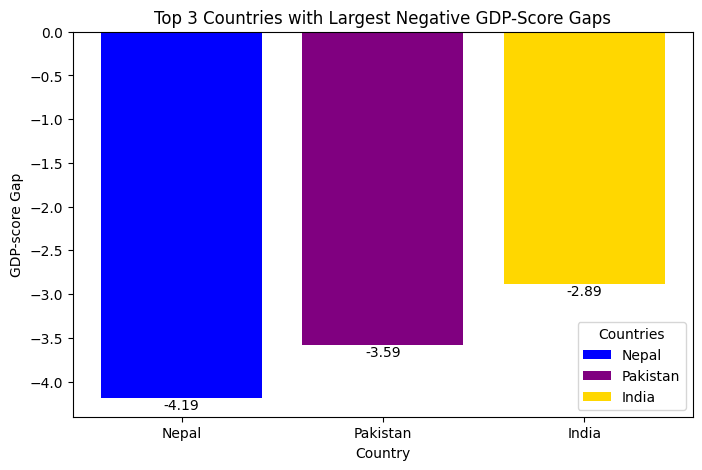

In [44]:
#for positive gaps

plt.figure(figsize=(8, 5))

top_positive_gaps = south_asia_df.nlargest(3, 'GDP-score gap')
colors= ['teal', 'orange', 'lightgreen']

bars_positive= plt.bar(top_positive_gaps['Country name'], top_positive_gaps['GDP-score gap'], color=colors)
plt.xlabel('Country')
plt.ylabel('GDP-score Gap')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')

for i in range(len(top_positive_gaps)):
    plt.text(i, top_positive_gaps['GDP-score gap'].iloc[i], round(top_positive_gaps['GDP-score gap'].iloc[i], 2), 
             ha='center', va='bottom', color='black')
plt.legend(bars_positive, top_positive_gaps['Country name'], title="Countries", loc="upper right")

plt.show()

#for negative gaps
plt.figure(figsize=(8, 5))

top_negative_gaps = south_asia_df.nsmallest(3, 'GDP-score gap')
colors_negative = ['blue', 'purple', 'gold']

bars_negative = plt.bar(top_negative_gaps['Country name'], top_negative_gaps['GDP-score gap'], color=colors_negative)
plt.xlabel('Country')
plt.ylabel('GDP-score Gap')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')

for i in range(len(top_negative_gaps)):
    plt.text(i, top_negative_gaps['GDP-score gap'].iloc[i], round(top_negative_gaps['GDP-score gap'].iloc[i], 2), 
             ha='center', va='top', color='black')
plt.legend(bars_negative, top_negative_gaps['Country name'], title="Countries", loc="lower right")

plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.


Happiness in South Asia is influenced by factors beyond economic performance, with social, cultural, and institutional elements playing a key role. Nepal stands out for achieving the highest happiness score relative to its GDP, likely due to strong social cohesion and effective resource utilization. Pakistan also shows higher happiness than its GDP suggests, driven by community resilience and cultural support. In contrast, India and Bangladesh reveal significant gaps between economic growth and happiness, reflecting challenges like inequality and resource access. Afghanistan, despite having the lowest happiness score, demonstrates that even in dire conditions, non-economic factors can slightly improve well-being.

# 3.3 Problem 3: Comparative Analysis

## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [21]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_df.to_csv('Middle_East_Countries_HR.csv', index=False)
print('File saved')

File saved


In [9]:
print(middle_east_df)

             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

In [13]:
Q1_middle_east = middle_east_df['score'].quantile(0.25)
Q3_middle_east = middle_east_df['score'].quantile(0.75)
IQR_middle_east = Q3_middle_east - Q1_middle_east

lower_bound_middle_east = Q1_middle_east - 1.5 * IQR_middle_east
upper_bound_middle_east = Q3_middle_east + 1.5 * IQR_middle_east

outliers_iqr_middle_east = middle_east_df[(middle_east_df['score'] < lower_bound_middle_east) | (middle_east_df['score'] > upper_bound_middle_east)]
print("Outliers based on IQR in Middle East countries:")
print(outliers_iqr_middle_east)

Outliers based on IQR in Middle East countries:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []


1. Descriptive Statistics:
### • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [14]:
mean_score_middle_east = middle_east_df['score'].mean()
std_score_middle_east = middle_east_df['score'].std()

print(f"Mean of Score: {mean_score_middle_east:.2f}")
print(f"Standard Deviation of Score: {std_score_middle_east:.2f}")

Mean of Score: 5.35
Standard Deviation of Score: 1.65


In [15]:
mean_score_south_asia = south_asia_df['score'].mean()
std_score_south_asia = south_asia_df['score'].std()

print(f"Mean of Score: {mean_score_south_asia:.2f}")
print(f"Standard Deviation of Score: {std_score_south_asia:.2f}")

Mean of Score: 3.90
Standard Deviation of Score: 1.32


In [17]:
mean_score_without_outlier = excluding_afghanistan['score'].mean()
std_score_without_outlier = excluding_afghanistan['score'].std()

print(f"Mean of 'score' without Afghanistan: {mean_score_without_outlier:.2f}")
print(f"Standard Deviation of 'score' without Afghanistan: {std_score_without_outlier:.2f}")

Mean of 'score' without Afghanistan: 4.44
Standard Deviation of 'score' without Afghanistan: 0.58


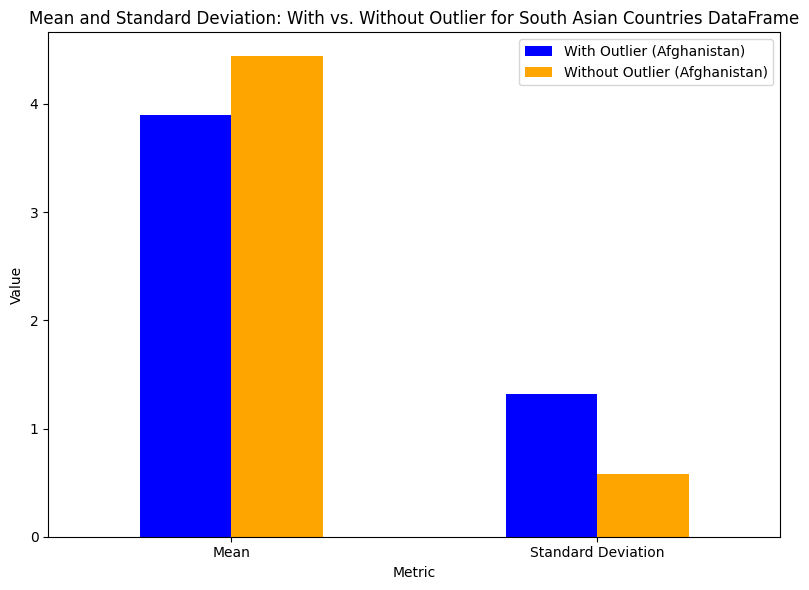

In [22]:
mean_with_outlier = south_asia_with_outlier.mean()
std_with_outlier = south_asia_with_outlier.std()

mean_without_outlier = south_asia_without_outlier.mean()
std_without_outlier = south_asia_without_outlier.std()

data = {
    'Metric': ['Mean', 'Standard Deviation'],
    'With Outlier': [mean_with_outlier, std_with_outlier],
    'Without Outlier': [mean_without_outlier, std_without_outlier]
}

df = pd.DataFrame(data)

# Plotting the bar chart
df.plot(x='Metric', kind='bar', figsize=(8, 6), color=['blue', 'orange'], legend=False)
plt.title('Mean and Standard Deviation: With vs. Without Outlier for South Asian Countries DataFrame')
plt.ylabel('Value')
plt.xticks(rotation=0)

plt.legend(['With Outlier (Afghanistan)', 'Without Outlier (Afghanistan)'], loc='upper right')
plt.tight_layout()
plt.show()

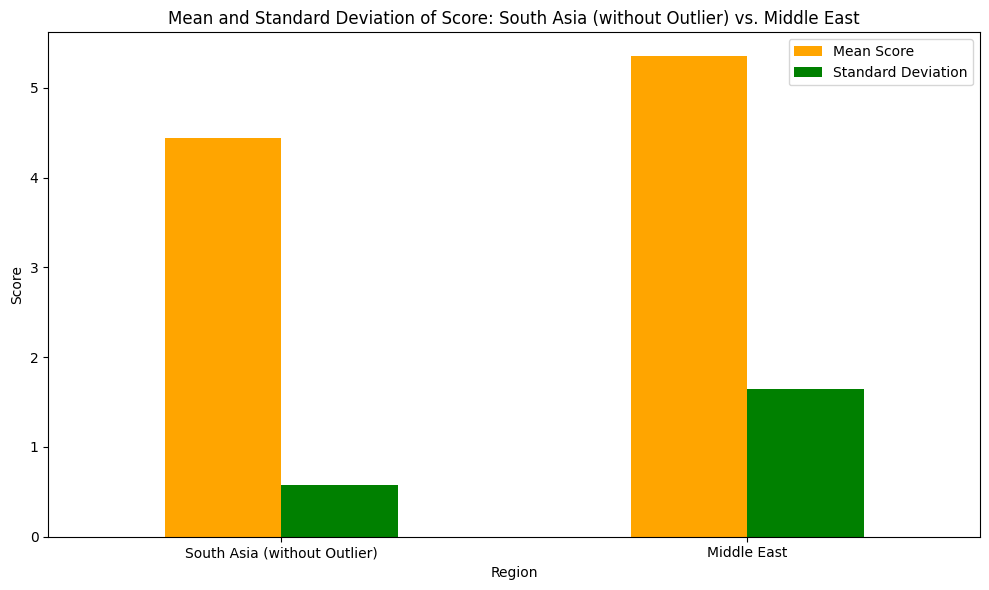

In [28]:
mean_score_south_asia_no_outlier = 4.44  
std_score_south_asia_no_outlier = 0.58  

mean_score_middle_east = 5.35
std_score_middle_east = 1.65 

data = {
    'Region': ['South Asia (without Outlier)', 'Middle East'],
    'Mean Score': [mean_score_south_asia_no_outlier, mean_score_middle_east],
    'Std Dev of Score': [std_score_south_asia_no_outlier, std_score_middle_east]
}

df = pd.DataFrame(data)

ax = df.plot(x='Region', kind='bar', figsize=(10, 6), color=['orange', 'green'], legend=True)

plt.title('Mean and Standard Deviation of Score: South Asia (without Outlier) vs. Middle East')
plt.ylabel('Score')
plt.xlabel('Region')
plt.xticks(rotation=0)

plt.legend(['Mean Score', 'Standard Deviation'])

plt.tight_layout()
plt.show()

### ● Which region has higher happiness Scores on average?

>**Excluding Afghanistan, an outlier, raises the mean happiness score of South Asian countries from 3.90 to 4.44 and reduces the standard deviation from 1.32 to 0.58. These South Asian countries likely share more similar socio-economic conditions and cultural factors, which is resulting in lower variability. Afghanistan’s inclusion increases variability and pulls the average down, which greatly impacts a fair comparison. Factors like prolonged conflict, poor infrastructure, and lack of social support make Afghanistan an outlier, and its exclusion provides a clearer representation of the rest of South Asia. Regardless of Afghanistan's inclusion, the Middle East region has the highest mean and standard deviation. Diverse economic conditions, cultural or regional differences might be the reason for their higher variability.**

2. Top and Bottom Performers
### • Identify the top 3 and bottom 3 countries in each region based on the score.
### • Plot bar charts comparing these charts.

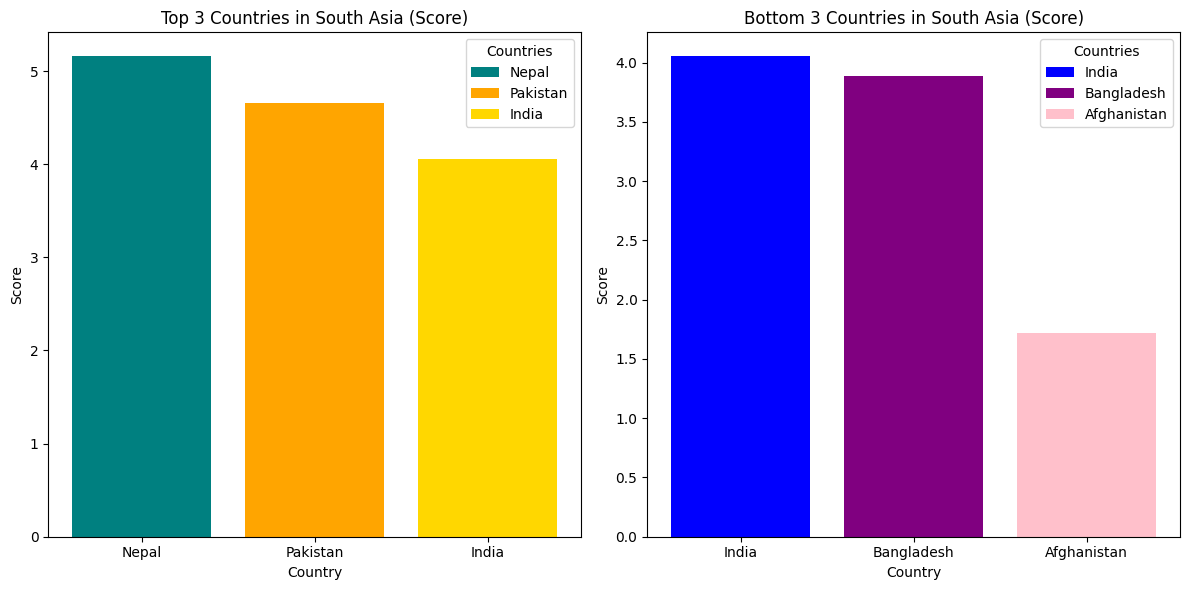

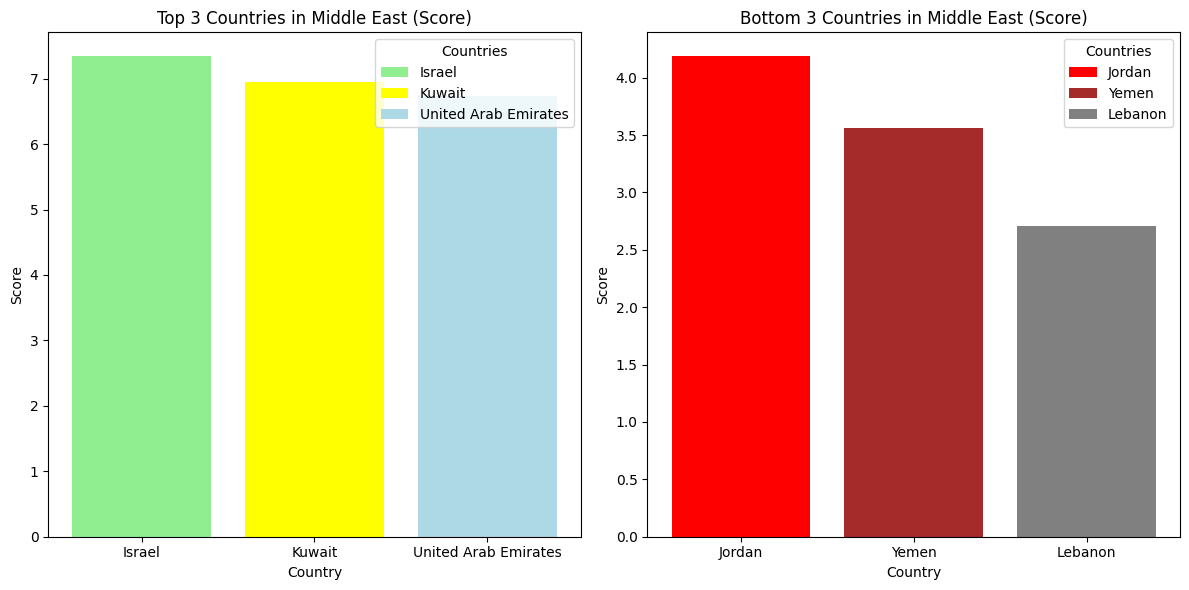

In [38]:
south_asia_sorted = south_asia_df.sort_values(by='score', ascending=False)

top_3_south_asia = south_asia_sorted.head(3)
bottom_3_south_asia = south_asia_sorted.tail(3)

middle_east_sorted = middle_east_df.sort_values(by='score', ascending=False)

top_3_middle_east = middle_east_sorted.head(3)
bottom_3_middle_east = middle_east_sorted.tail(3)

south_asia_colors_top = ['teal', 'orange', 'gold']
south_asia_colors_bottom = ['blue', 'purple', 'pink']
middle_east_colors_top = ['lightgreen', 'yellow', 'lightblue']
middle_east_colors_bottom = ['red', 'brown', 'gray']

plt.figure(figsize=(12, 6))

# Top 3 South Asia
plt.subplot(1, 2, 1) 
bars_top_sa = plt.bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color=south_asia_colors_top)
plt.title('Top 3 Countries in South Asia (Score)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(bars_top_sa, top_3_south_asia['Country name'], title="Countries", loc="upper right")

# Bottom 3 South Asia
plt.subplot(1, 2, 2)  
bars_bottom_sa = plt.bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color=south_asia_colors_bottom)
plt.title('Bottom 3 Countries in South Asia (Score)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(bars_bottom_sa, bottom_3_south_asia['Country name'], title="Countries", loc="upper right")

plt.tight_layout()

plt.figure(figsize=(12, 6))

# Top 3 Middle East
plt.subplot(1, 2, 1) 
bars_top_me = plt.bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color=middle_east_colors_top)
plt.title('Top 3 Countries in Middle East (Score)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(bars_top_me, top_3_middle_east['Country name'], title="Countries", loc="upper right")

# Bottom 3 Middle East
plt.subplot(1, 2, 2)  
bars_bottom_me = plt.bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color=middle_east_colors_bottom)
plt.title('Bottom 3 Countries in Middle East (Score)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(bars_bottom_me, bottom_3_middle_east['Country name'], title="Countries", loc="upper right")
plt.savefig("Top_Bottom_3_Both.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

>**Israel leads with the highest score of approximately 7.5. Kuwait follows closely (approximately 7.0), and UAE ranks third. High scores in Israel, Kuwait, and the UAE are closely tied to their economic wealth and social support systems. In contrast, South Asia’s happiest country Nepal’s score (5.158) is significantly higher than the scores of Jordan, Yemen and Lebanon. This suggests better overall well-being and satisfaction among Nepal’s residents compared to these bottom 3 middle eastern countries. Despite having a significantly lower GDP per capita, Nepal's happiness score remains relatively high compared to these bottom 3 countries.**

In [19]:
q1_gdp = south_asia_df['Freedom to make life choices'].quantile(0.25)
q3_gdp = south_asia_df['Freedom to make life choices'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

gdp_lower_bound = q1_gdp - 1.5 * iqr_gdp
gdp_upper_bound = q3_gdp + 1.5 * iqr_gdp

q1_social_support = south_asia_df['Social support'].quantile(0.25)
q3_social_support = south_asia_df['Social support'].quantile(0.75)
iqr_social_support = q3_social_support - q1_social_support

social_support_lower_bound = q1_social_support - 1.5 * iqr_social_support
social_support_upper_bound = q3_social_support + 1.5 * iqr_social_support

q1_healthy_life_expectancy = south_asia_df['Healthy life expectancy'].quantile(0.25)
q3_healthy_life_expectancy = south_asia_df['Healthy life expectancy'].quantile(0.75)
iqr_healthy_life_expectancy = q3_healthy_life_expectancy - q1_healthy_life_expectancy

healthy_life_lower_bound = q1_healthy_life_expectancy - 1.5 * iqr_healthy_life_expectancy
healthy_life_upper_bound = q3_healthy_life_expectancy + 1.5 * iqr_healthy_life_expectancy

gdp_outliers = south_asia_df[(south_asia_df['Freedom to make life choices'] < gdp_lower_bound) | 
                             (south_asia_df['Freedom to make life choices'] > gdp_upper_bound)]

social_support_outliers = south_asia_df[
    (south_asia_df['Social support'] < social_support_lower_bound) | 
    (south_asia_df['Social support'] > social_support_upper_bound)]

healthy_life_outliers = south_asia_df[
    (south_asia_df['Healthy life expectancy'] < healthy_life_lower_bound) | 
    (south_asia_df['Healthy life expectancy'] > healthy_life_upper_bound)]

print("Outlier countries based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Freedom to make life choices']])

print("Outlier countries based on social support:")
print(social_support_outliers[['Country name', 'Social support']])

print("Outlier countries based on healthy life expectancy:")
print(healthy_life_outliers[['Country name', 'Healthy life expectancy']])

print(f"GDP bounds: {gdp_lower_bound:.2f} to {gdp_upper_bound:.2f}")
print(f"Social Support bounds: {social_support_lower_bound:.2f} to {social_support_upper_bound:.2f}")
print(f"Healthy Life Expectancy bounds: {healthy_life_lower_bound:.2f} to {healthy_life_upper_bound:.2f}")


Outlier countries based on GDP per Capita:
    Country name  Freedom to make life choices
142  Afghanistan                           0.0
Outlier countries based on social support:
Empty DataFrame
Columns: [Country name, Social support]
Index: []
Outlier countries based on healthy life expectancy:
Empty DataFrame
Columns: [Country name, Healthy life expectancy]
Index: []
GDP bounds: 0.20 to 1.10
Social Support bounds: -0.36 to 1.26
Healthy Life Expectancy bounds: 0.14 to 0.63


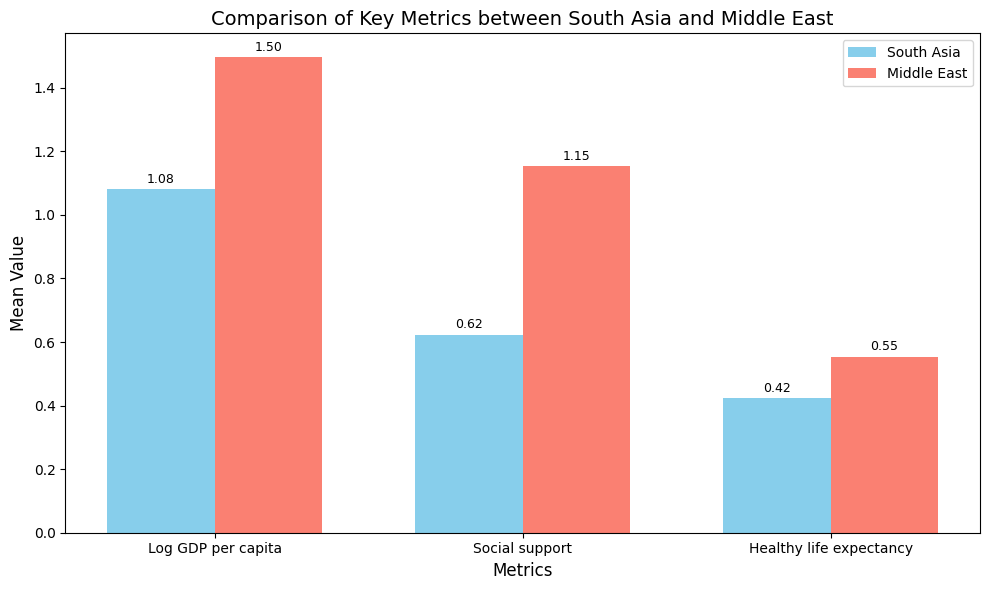

In [22]:
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = excluding_afghanistan[key_metrics].mean()

middle_east_means = middle_east_df[key_metrics].mean()

comparison_df = pd.DataFrame({
    'South Asia': south_asia_means,
    'Middle East': middle_east_means
})

comparison_df = comparison_df.T

bar_width = 0.35 
x = np.arange(len(key_metrics)) 

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, comparison_df.loc['South Asia'], bar_width, label='South Asia', color='skyblue')

ax.bar(x + bar_width/2, comparison_df.loc['Middle East'], bar_width, label='Middle East', color='salmon')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Comparison of Key Metrics between South Asia and Middle East', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(key_metrics, fontsize=10)
ax.legend()

for i in range(len(comparison_df.columns)):  
    value = comparison_df.loc['South Asia'].iloc[i]  
    ax.text(i - bar_width / 2, value + 0.02, f'{value:.2f}', ha='center', fontsize=9)

for i in range(len(comparison_df.columns)):  
    value = comparison_df.loc['Middle East'].iloc[i] 
    ax.text(i + bar_width / 2, value + 0.02, f'{value:.2f}', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

In [47]:
disparities = abs(comparison_df.loc['South Asia'] - comparison_df.loc['Middle East'])

largest_disparity_metric = disparities.idxmax()
largest_disparity_value = disparities.max()

print("Disparities between South Asia and Middle East for each metric:")
print(disparities)

print(f"\nThe metric with the largest disparity is: {largest_disparity_metric}")
print(f"The largest disparity value is: {largest_disparity_value:.2f}")


Disparities between South Asia and Middle East for each metric:
Log GDP per capita         0.415833
Social support             0.529778
Healthy life expectancy    0.130611
dtype: float64

The metric with the largest disparity is: Social support
The largest disparity value is: 0.53


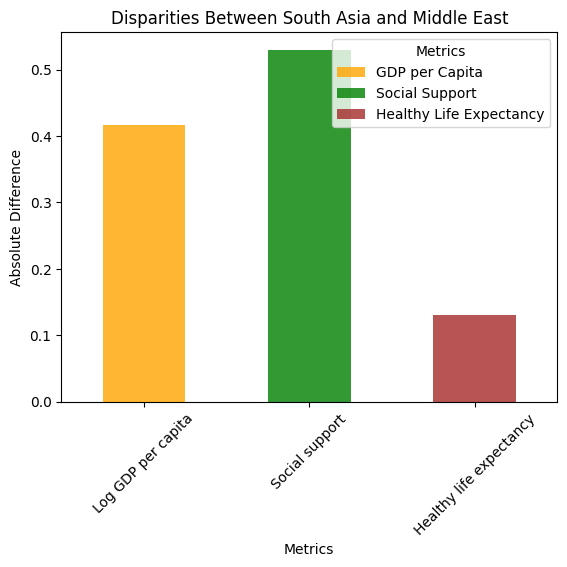

In [48]:
fig, ax = plt.subplots()
colors = ['orange', 'green', 'brown']
labels = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy']

bars = disparities.plot(kind='bar', ax=ax, color=colors, alpha=0.8)

ax.set_title('Disparities Between South Asia and Middle East')
ax.set_ylabel('Absolute Difference')
ax.set_xlabel('Metrics')

ax.legend(bars.get_children(), labels, title="Metrics")

plt.xticks(rotation=45)
plt.show()


In [37]:
def compute_range_and_cv(df, column='score', region_name='Region'):
    score_range = df[column].max() - df[column].min()
    score_mean = df[column].mean()
    score_std = df[column].std()
    score_cv = (score_std / score_mean) * 100
    return score_range, score_cv

range_south_asia, cv_south_asia = compute_range_and_cv(south_asia_df, column='score', region_name='South Asia')

south_asia_without_outlier = south_asia_df[south_asia_df['Country name'] != 'Afghanistan']
range_south_asia_no_outlier, cv_south_asia_no_outlier = compute_range_and_cv(south_asia_without_outlier, column='score', region_name='South Asia (No Outlier)')

range_middle_east, cv_middle_east = compute_range_and_cv(middle_east_df, column='score', region_name='Middle East')

print(f"South Asia (with outlier) - Range: {range_south_asia:.2f}, CV: {cv_south_asia:.2f}%")
print(f"South Asia (without outlier) - Range: {range_south_asia_no_outlier:.2f}, CV: {cv_south_asia_no_outlier:.2f}%")
print(f"Middle East - Range: {range_middle_east:.2f}, CV: {cv_middle_east:.2f}%")

if cv_south_asia > cv_middle_east:
    print("\nSouth Asia (with outlier) has greater variability in happiness.")
else:
    print("\nMiddle East has greater variability in happiness.")


South Asia (with outlier) - Range: 3.44, CV: 33.79%
South Asia (without outlier) - Range: 1.27, CV: 13.13%
Middle East - Range: 4.63, CV: 28.94%

South Asia (with outlier) has greater variability in happiness.


South Asia (with outlier):

Range: 3.44
Coefficient of Variation (CV): 33.79%
South Asia (without outlier):

Range: 1.27
Coefficient of Variation (CV): 13.13%
Middle East:

Range: 4.63
Coefficient of Variation (CV): 30.81%
Interpretation:
South Asia (with outlier) shows greater variability in happiness compared to the Middle East, with a higher range and CV. This indicates that South Asia's happiness scores, with Afghanistan included as an outlier, are more spread out and more variable.

South Asia (without outlier) shows much less variability, with a significantly lower CV when Afghanistan is excluded.

Middle East, with a CV of 30.81%, also has substantial variability but not as much as South Asia when the outlier is included.

Conclusion:
With outliers, South Asia has more variability in happiness than the Middle East.
Without the outlier, the variability in South Asia decreases significantly, making the Middle East appear more variable in comparison.
This result highlights the influence of outliers (such as Afghanistan) on the overall variability of happiness scores. When the outlier is removed, the picture changes, showing less disparity between the two regions.

5. Correlation Analysis:
### • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
### • Create scatter plots to visualize and interpret the relationships.


In [32]:
south_asia_corr = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("Correlation Matrix for South Asia:")
print(south_asia_corr)
print("\nCorrelation Matrix for Middle East:")
print(middle_east_corr)

Correlation Matrix for South Asia:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  

Correlation Matrix for Middle East:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


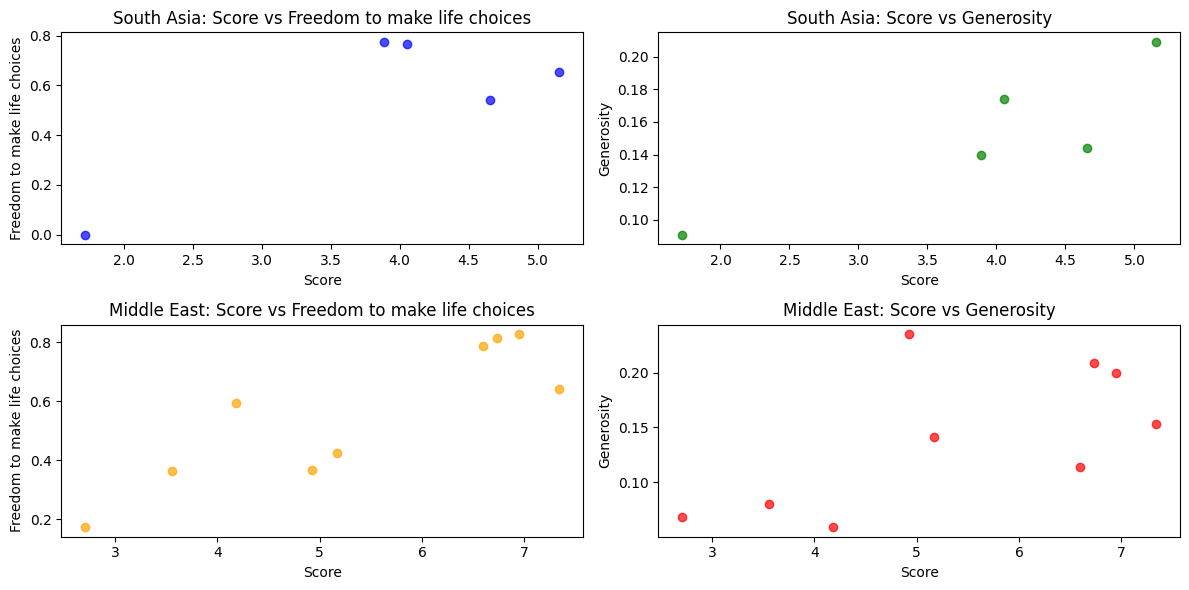

In [38]:
import matplotlib.pyplot as plt

variables = ['Freedom to make life choices', 'Generosity']

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(south_asia_df['score'], south_asia_df[variables[0]], alpha=0.7, color='blue')
plt.title("South Asia: Score vs Freedom to make life choices")
plt.xlabel("Score")
plt.ylabel(variables[0])

plt.subplot(2, 2, 2)
plt.scatter(south_asia_df['score'], south_asia_df[variables[1]], alpha=0.7, color='green')
plt.title("South Asia: Score vs Generosity")
plt.xlabel("Score")
plt.ylabel(variables[1])

plt.subplot(2, 2, 3)
plt.scatter(middle_east_df['score'], middle_east_df[variables[0]], alpha=0.7, color='orange')
plt.title("Middle East: Score vs Freedom to make life choices")
plt.xlabel("Score")
plt.ylabel(variables[0])

plt.subplot(2, 2, 4)
plt.scatter(middle_east_df['score'], middle_east_df[variables[1]], alpha=0.7, color='red')
plt.title("Middle East: Score vs Generosity")
plt.xlabel("Score")
plt.ylabel(variables[1])

plt.tight_layout()
plt.show()

6. Outlier Detection:
### • Identify outlier countries in both regions based on Score and GDP per Capita.
### • Plot these outliers and discuss their implications.

In [23]:
q1_gdp_me = middle_east_df['Log GDP per capita'].quantile(0.25)
q3_gdp_me = middle_east_df['Log GDP per capita'].quantile(0.75)
iqr_gdp_me = q3_gdp_me - q1_gdp_me

gdp_lower_bound_me = q1_gdp_me - 1.5 * iqr_gdp_me
gdp_upper_bound_me = q3_gdp_me + 1.5 * iqr_gdp_me

q1_score_me = middle_east_df['score'].quantile(0.25)
q3_score_me = middle_east_df['score'].quantile(0.75)
iqr_score_me = q3_score_me - q1_score_me

score_lower_bound_me = q1_score_me - 1.5 * iqr_score_me
score_upper_bound_me = q3_score_me + 1.5 * iqr_score_me

gdp_outliers_me = middle_east_df[(middle_east_df['Log GDP per capita'] < gdp_lower_bound_me) | 
                                 (middle_east_df['Log GDP per capita'] > gdp_upper_bound_me)]

score_outliers_me = middle_east_df[(middle_east_df['score'] < score_lower_bound_me) | 
                                   (middle_east_df['score'] > score_upper_bound_me)]

print("Outlier countries in Middle East based on GDP per Capita:")
print(gdp_outliers_me[['Country name', 'Log GDP per capita']])

print("\nOutlier countries in Middle East based on Score:")
print(score_outliers_me[['Country name', 'score']])

Outlier countries in Middle East based on GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []

Outlier countries in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


> **There is no outlier in Middle East countries.**

In [24]:
q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

gdp_lower_bound = q1_gdp - 1.5 * iqr_gdp
gdp_upper_bound = q3_gdp + 1.5 * iqr_gdp

q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

score_lower_bound = q1_score - 1.5 * iqr_score
score_upper_bound = q3_score + 1.5 * iqr_score

gdp_outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < gdp_lower_bound) | 
                             (south_asia_df['Log GDP per capita'] > gdp_upper_bound)]

score_outliers = south_asia_df[(south_asia_df['score'] < score_lower_bound) | 
                               (south_asia_df['score'] > score_upper_bound)]

print("Outlier countries based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nOutlier countries based on Score:")
print(score_outliers[['Country name', 'score']])


Outlier countries based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outlier countries based on Score:
    Country name  score
142  Afghanistan  1.721


As mentioned in the previous cells, Afghanistan stands as an outlier in the South Asian Countries Dataframe.

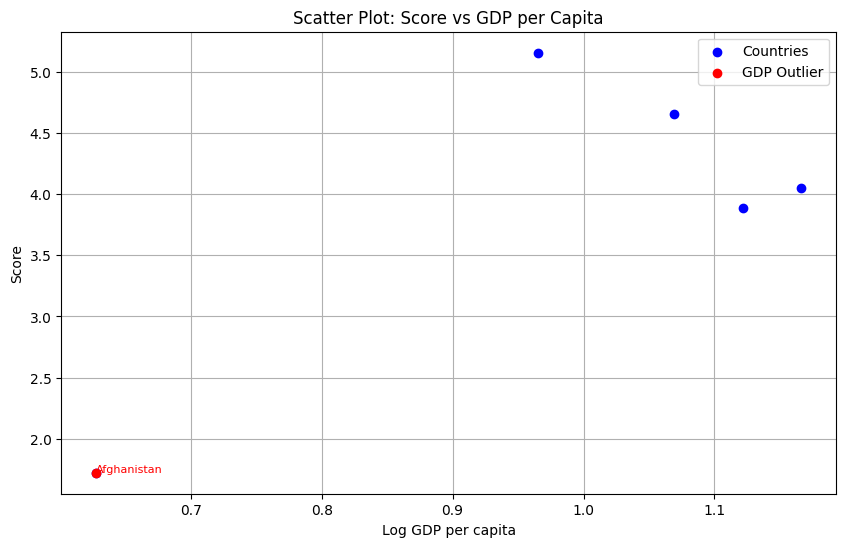

In [46]:
all_outliers = gdp_outliers.copy()
all_outliers['Outlier Type'] = 'GDP Outlier'

for i, row in score_outliers.iterrows():
    if row['Country name'] not in all_outliers['Country name'].values:
        new_row = row.copy()
        new_row['Outlier Type'] = 'Score Outlier'
        all_outliers = all_outliers.append(new_row)

plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Countries')

for i, row in all_outliers.iterrows():
    color = 'red' if row['Outlier Type'] == 'GDP Outlier' else 'orange'
    label = row['Outlier Type'] if i == all_outliers.index[0] else None
    plt.scatter(row['Log GDP per capita'], row['score'], color=color, label=label)
    plt.text(row['Log GDP per capita'], row['score'], row['Country name'], fontsize=8, color=color)

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot: Score vs GDP per Capita')
plt.legend()
plt.grid(True)

plt.show()

7. Visualization:
### • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
### • Interpret the key differences in distribution shapes, medians, and outliers.


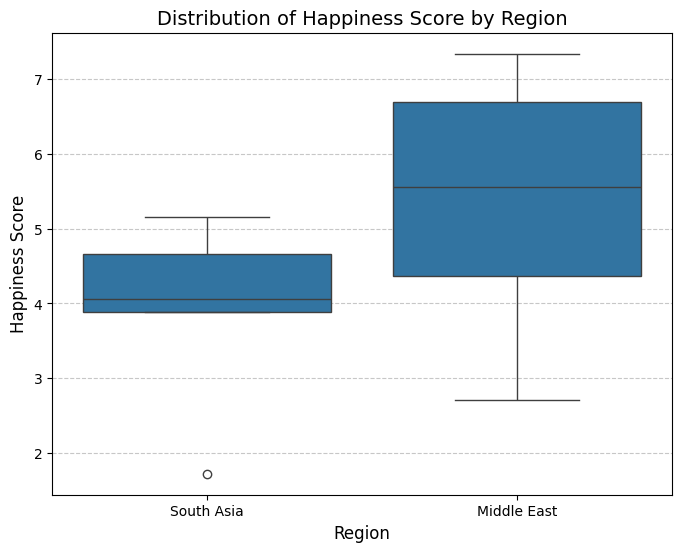

In [27]:
try:
    south_asia_df.loc[:, 'Region'] = 'South Asia'
    middle_east_df.loc[:, 'Region'] = 'Middle East'
except Exception as e:
    print(f"An error occurred while setting the 'Region' column: {e}")

try:
    combined_df = pd.concat([south_asia_df, middle_east_df], ignore_index=True)

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_df, x='Region', y='score')
    plt.title('Distribution of Happiness Score by Region', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
except Exception as e:
    print(f"An error occurred during plotting: {e}")


>**The range of scores is relatively narrow in South Asia, indicating that happiness scores in this region are less spread out. However, there is one outlier on the lower end. In contrast, the range of scores in the Middle East is wider, suggesting greater variability in happiness scores within this region. Moreover, the box plot clearly shows that the Middle East generally has higher happiness scores compared to South Asia. Additionally, there are no visible outliers in the Middle East plot, further highlighting the differences in score distribution between the two regions.**